<a href="https://colab.research.google.com/github/Nishad-Dhodapkar/Medical-Insurance-Cost-Prediction-Using-Machine-Learning/blob/main/ML_Mini_Project_Medical_insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About The Dataset**

**Context**

People are always confused about their medical insurance and don't know the cost of insurance at different ages and conditions. This data is useful for these people and is useful to make predictions of the insurance cost they will have to pay.

Importing the dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR

Data collection and analysis

In [ ]:
#loading the dataset from a csv file to a pandas dataset
df = pd.read_csv('insurance.csv')

In [ ]:
#Printing the first 5 rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df = pd.get_dummies(df, drop_first = True)

#Getting the number of rows and columns of the dataset
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [ ]:
#Total number of cells in the dataset
df.size

12042

In [ ]:
#Getting some information about the dataset
df.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Checking for missing values:
df.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [ ]:
#There are no missing values in the dataset
df.dropna()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


Data Analysis:


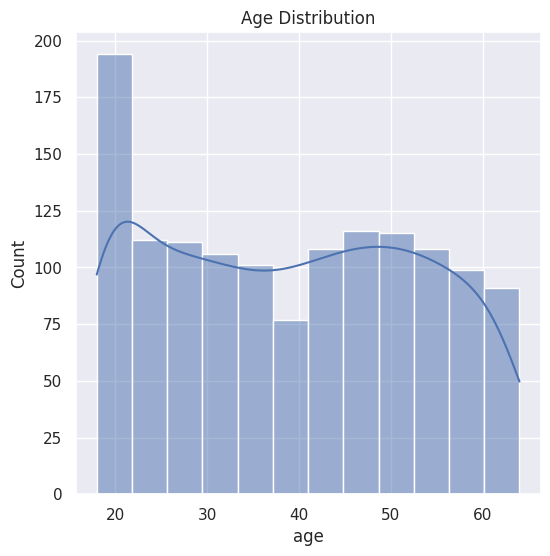

In [ ]:
#age column distribution
sns.set()
plt.figure(figsize = (6,6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

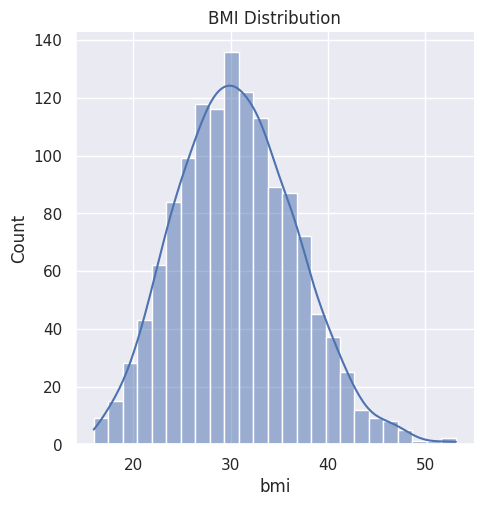

In [ ]:
#bmi column distribution
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['bmi'],kde='True')
plt.title('BMI Distribution')
plt.show()

The optimal range of BMI is between 18.5 to 25

From the above distribution we can see that maximum number of people have their BMI greater than 25 which can be a key factor affecting the health insurance


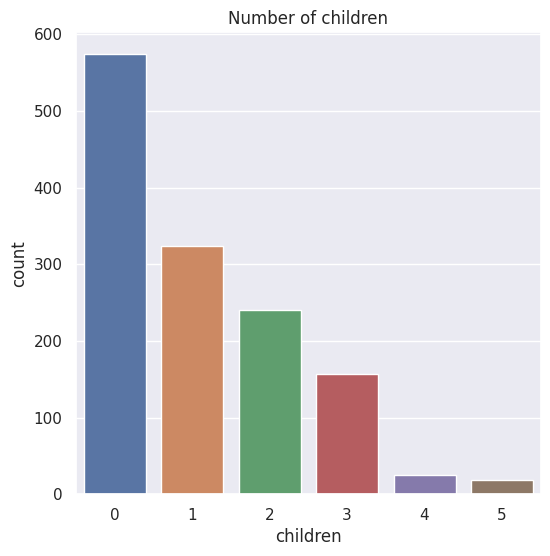

In [ ]:
#children column distribution
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('Number of children')
plt.show()

In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

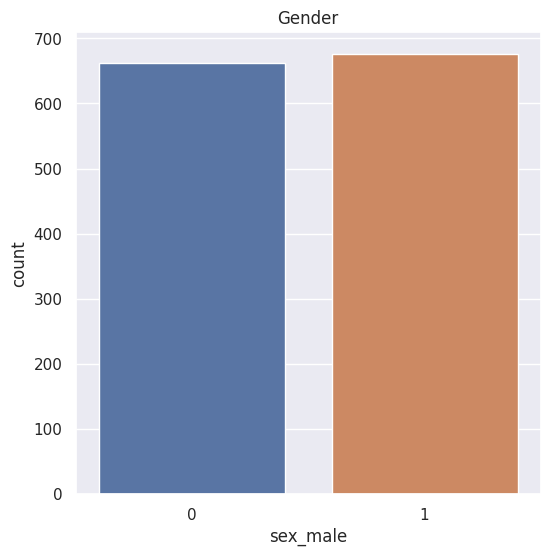

In [ ]:
#sex column distribution
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = 'sex_male',data = df)
plt.title('Gender')
plt.show()

In [ ]:
df['sex_male'].value_counts()

1    676
0    662
Name: sex_male, dtype: int64

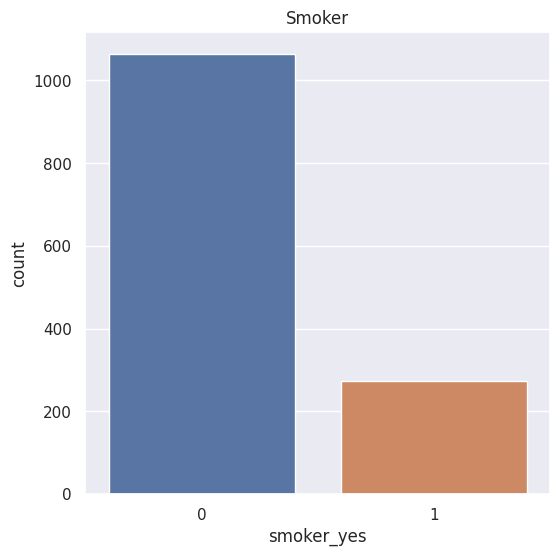

In [ ]:
#smoker column distribution
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = 'smoker_yes',data = df)
plt.title('Smoker')
plt.show()

In [ ]:
df['smoker_yes'].value_counts()

0    1064
1     274
Name: smoker_yes, dtype: int64

<Figure size 600x600 with 0 Axes>

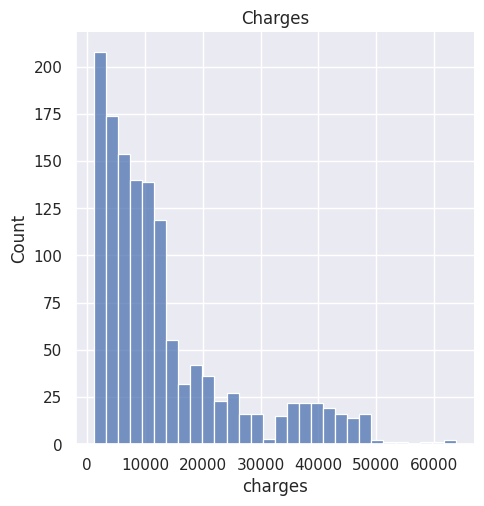

In [ ]:
#charges column distribution
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['charges'])
plt.title('Charges')
plt.show()

In [ ]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


**Data Preprocessing:**

Categorical features:

*   sex
*   smoker
*   region






Encoding the categorical features:

Splitting the features and target variables:

In [ ]:
X = df.drop(columns = 'charges', axis=1)
Y = df['charges']

In [ ]:
#printing the independent variables
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [ ]:
#printing the dependent variable
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Splitting the data into training data and testing data:

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3 ,random_state=2)

In [ ]:
print(X.shape , X_train.shape , X_test.shape)

(1338, 8) (936, 8) (402, 8)


Model 1 training: Linear regression

In [ ]:
model1 = LinearRegression()

model1.fit(X_train, Y_train)

training_data_prediction = model1.predict(X_train)
test_data_prediction = model1.predict(X_test)

Evaluation of model 1:

In [ ]:
# training data
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R squared value of training data: ",r2_train)

#test data
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print("R squared value of testing data: ",r2_test)

R squared value of training data:  0.7428108911901881
R squared value of testing data:  0.7642348545269875


Model 2 training: Lasso regressor

In [ ]:
model2 = Lasso()
model2.fit(X_train, Y_train)

training_data_prediction = model2.predict(X_train)
test_data_prediction = model2.predict(X_test)

Evaluation of model 2:

In [ ]:
# training data
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R squared value of training data: ",r2_train)

#test data
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print("R squared value of testing data: ",r2_test)

R squared value of training data:  0.7428104421453647
R squared value of testing data:  0.7642331805740583


Model 3 training: Random Forest regressor

In [ ]:
model3 = RandomForestRegressor(n_estimators = 100)
model3.fit(X_train.values, Y_train.values)


training_data_prediction = model3.predict(X_train)
test_data_prediction = model3.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Evaluation of model 3:

In [ ]:
#training data
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R squared value of training data: ",r2_train)

#testing data
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print("R squared value of testing data: ",r2_test)

R squared value of training data:  0.9763019565918075
R squared value of testing data:  0.850272026016192


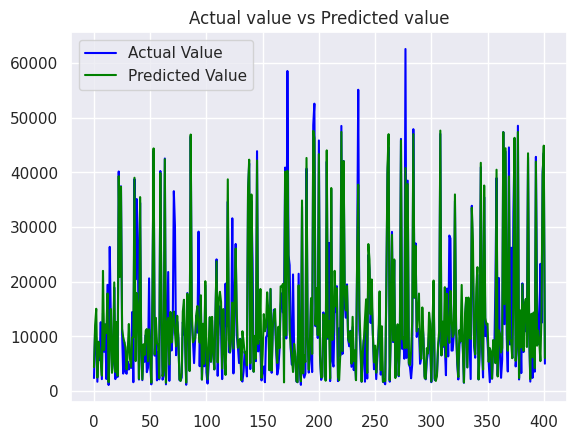

In [ ]:
#comparing the actual values and predicted values in a plot
Y_test = list(Y_test)
plt.plot(Y_test, color = 'blue', label = "Actual Value")
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual value vs Predicted value')
plt.legend()
plt.show()

Training of model 4: XGBoost regressor

In [ ]:
#training_data_prediction
model4 = XGBRegressor()

model4.fit(X_train, Y_train)

training_data_prediction = model4.predict(X_train)
test_data_prediction = model4.predict(X_test)

Evaluation of model 4:

In [ ]:
#training data
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R squared value of training data: ",r2_train)

#testing data
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print("R squared value of testing data: ",r2_test)

R squared value of training data:  0.9975323727657709
R squared value of testing data:  0.8198281593797385


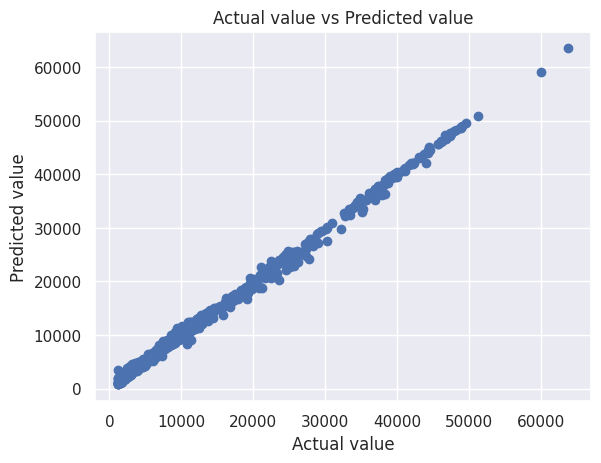

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual value vs Predicted value')
plt.show()

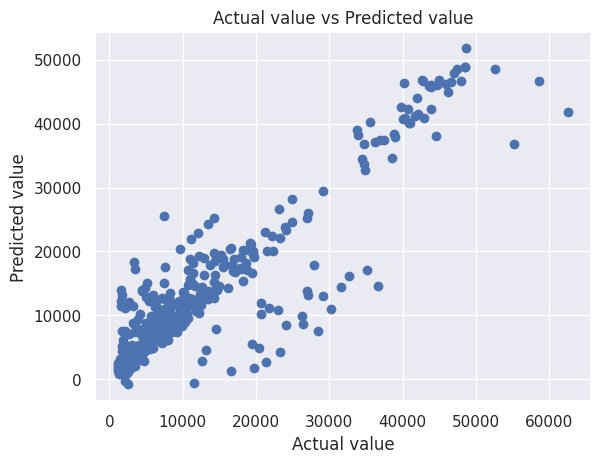

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual value vs Predicted value')
plt.show()

In [ ]:
model5 = KNeighborsRegressor()
model5.fit(X_train,Y_train)
Y_train_pred = model5.predict(X_train)
Y_test_pred = model5.predict(X_test)

In [ ]:
score = metrics.r2_score(Y_train,Y_train_pred)
score1 = metrics.r2_score(Y_test,Y_test_pred)
score1

0.15062474373102697

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
model7 = DecisionTreeRegressor()
model7.fit(X_train,Y_train)

cv = KFold(n_splits = 5)
cvscore = cross_val_score(model7,X=X_train,y=Y_train,cv=5)
cvscore

array([0.67758187, 0.72019094, 0.72579222, 0.60708984, 0.73649283])

In [ ]:
cvscore.mean()

0.6934295418037703

In [ ]:
score

0.4195431154721221

In [ ]:
model6 = DecisionTreeRegressor()
model6.fit(X_train,Y_train)

y_pred_train = model6.predict(X_train)
y_pred_test = model6.predict(X_test)



In [ ]:
score = metrics.r2_score(Y_train,y_pred_train)
score

score1 = metrics.r2_score(Y_test,y_pred_test)
score1

0.7292901148811394

In [ ]:
model8 = SVR()
model8.fit(X_train,Y_train)

SVR()

Building a predictive system:


In [ ]:
input_data = (31,0,25.74,0,0,0,0,1)

#changing input data to a numpy array
input_data_as_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = model3.predict(input_data_reshaped)
print(prediction)

print("The insurance cost is $",prediction[0])



[6142.7779413]
The insurance cost is $ 6142.777941300004
